In [1]:
# Importing necessary libaries

import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt 

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import warnings 
warnings.filterwarnings('ignore')

# BoomBikes Case Study

The steps we will follow in this exercise are as follows:
 1) Reading, understanding and visualising the data
 2) Preparing the data for modelling (train-test split, rescaling, etc.)
 3) Feature selection
 4) Training the model 
 5) Residual analysis 
 6) Predictions and evaluation on the test set

## Step 1: Reading, understanding and visualising the data

In [2]:
# read the data
bike_share = pd.read_csv("day.csv")
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
## Cleaning the data

# # Convert 'dteday' to datetime for better date handling
# bike_share['dteday'] = pd.to_datetime(bike_share['dteday'])

# We should drop the 'dteday' column because there are separate columns as 'mnth', 'yr' and 'weekday' to correlate the same thing
bike_share = bike_share.drop(['dteday'], axis=1)

# We will drop the 'casual' and 'registered' columns as we have to target only the 'cnt' variable
bike_share = bike_share.drop(['casual', 'registered'], axis=1)


In [6]:
# Dropping the instant(record index column) cause we dont need it, the dataframe has its own indexing
bike_share = bike_share.drop(['instant'], axis=1)
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
# Mapping all the values of categorical variables from the data dictionary

mapping_vars = ['mnth', 'weekday', 'weathersit', 'season']

# Defining the map function for different variables
# def mnth_map(x):
#     return x.replace({1: 'January', 2: 'February', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

# def weekday_map(x):
#     return x.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

# # the 'weathersit' variable only contain 3 values(1,2,3), therefore we'll only map three values
# def weather_map(x):
#     return x.replace({1:'Clear', 2:'Cloudy', 3:'Rain'})

# def season_map(x):
#     return x.replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Applying the function to the mapping_vars list
# bike_share['mnth'] = bike_share['mnth'].apply(mnth_map)
bike_share['mnth'] = bike_share['mnth'].map(({1: 'January', 2: 'February', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}))
bike_share['weekday'] = bike_share['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
bike_share['weathersit'] = bike_share['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'Rain'})
bike_share['season'] = bike_share['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})


In [8]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
num_vars = ["temp", 'atemp', 'hum', 'windspeed']
cat_vars = ['yr', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',]

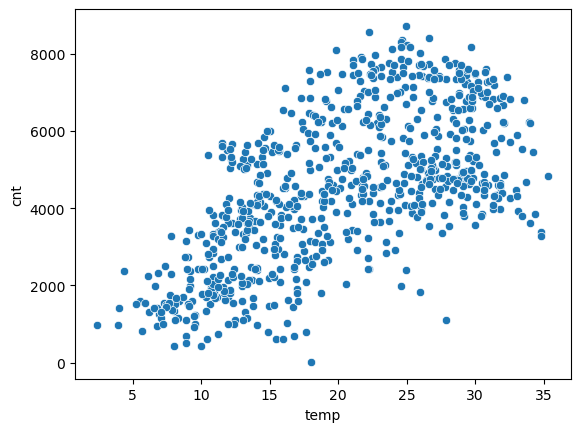

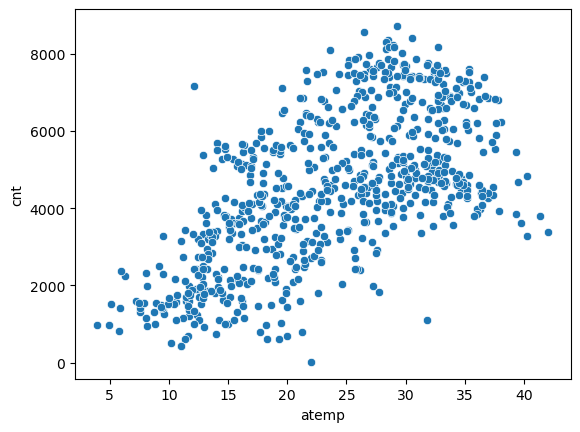

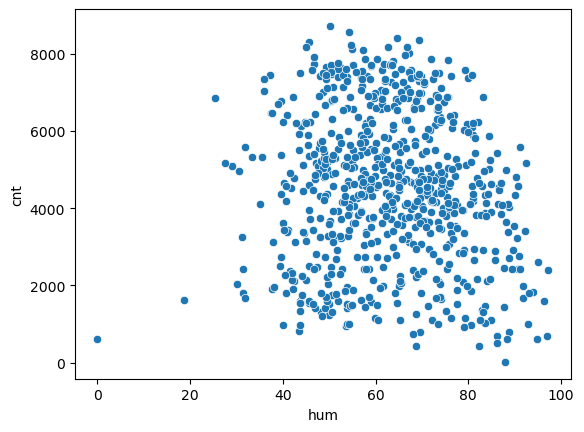

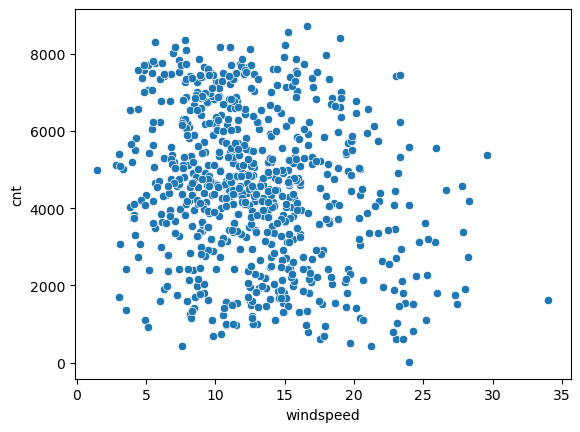

In [10]:
# visualising data to find the features that are correlating with the cnt the most

for col1 in num_vars:
    sns.scatterplot(x=bike_share[col1], y=bike_share['cnt'])
    plt.show()

In [11]:
## Through the above plots we can obseve that 'temp' variable can add a great value in the LR model

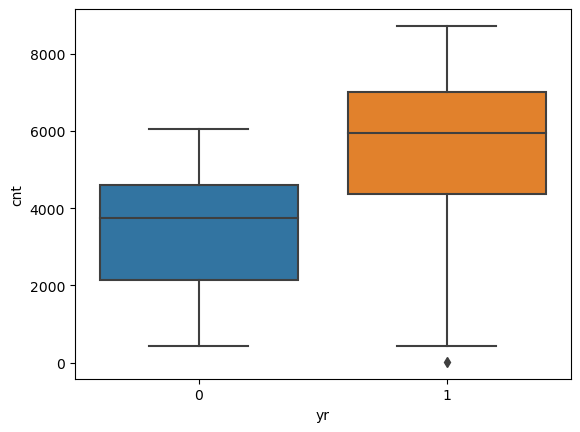

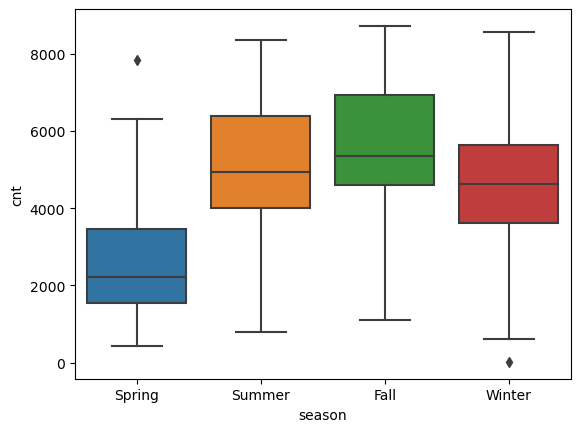

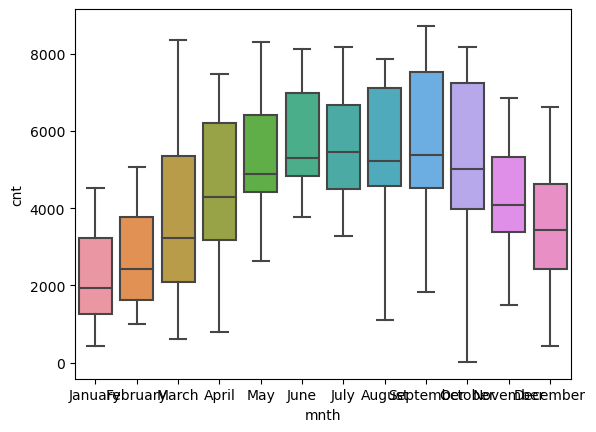

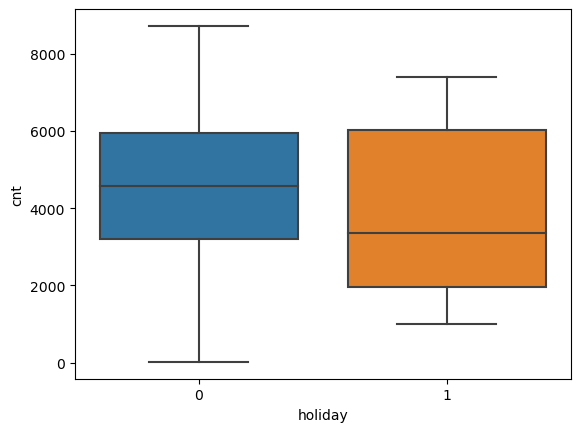

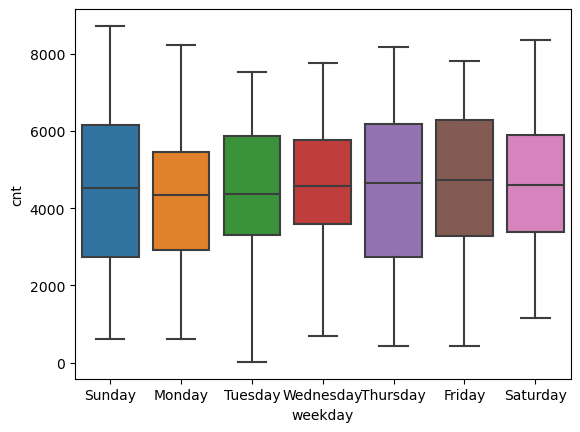

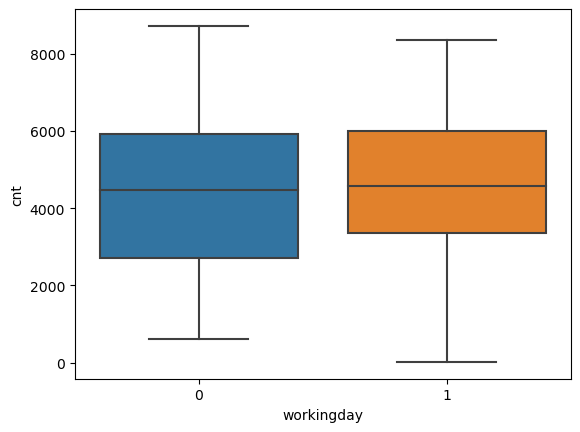

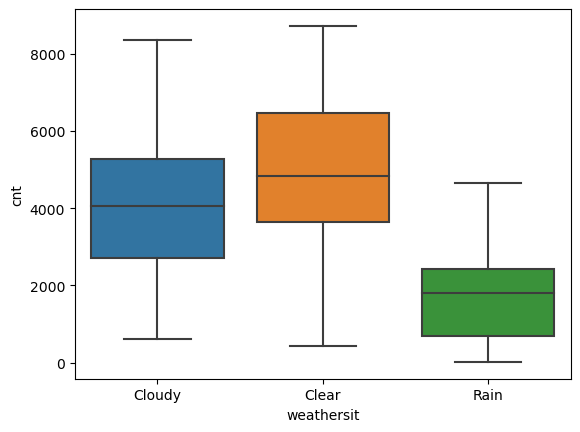

In [12]:
#Now categorical
for col1 in cat_vars:
    sns.boxplot(x=bike_share[col1], y=bike_share['cnt'])
    plt.show()

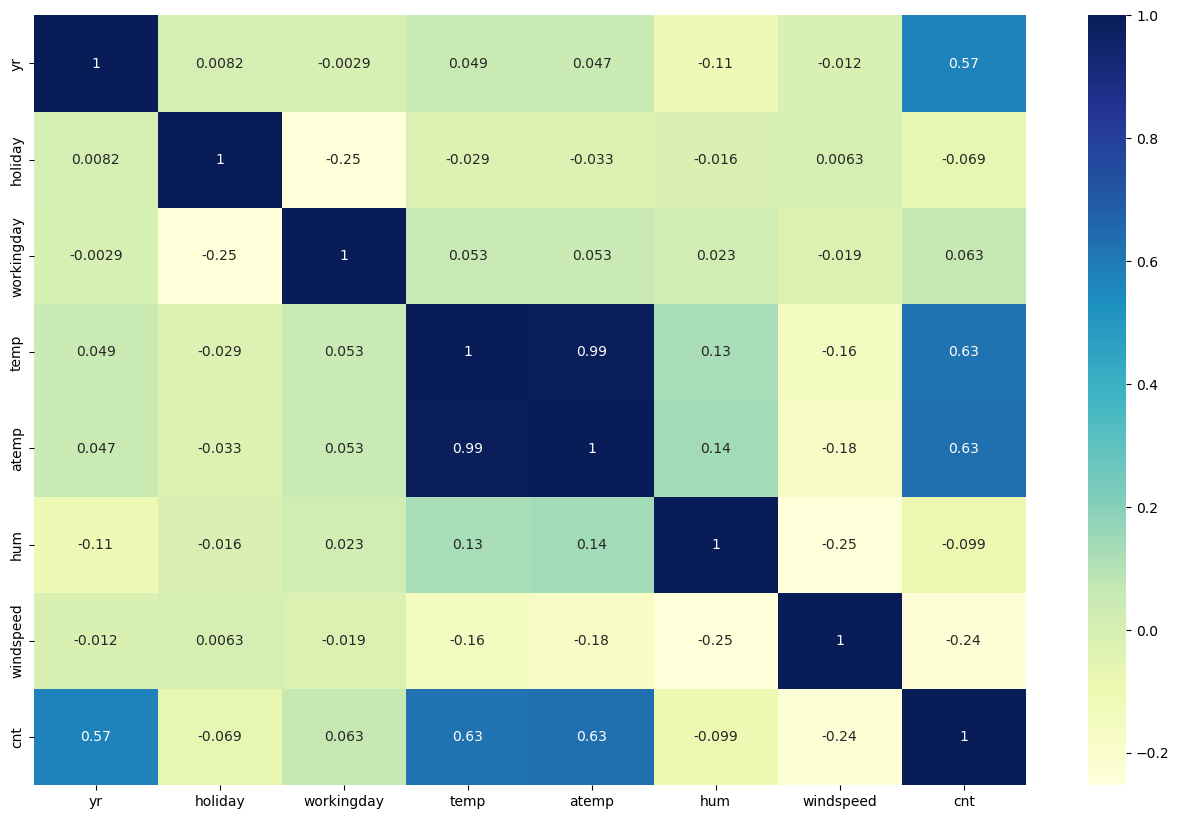

In [13]:
# Now let us plot a heatmap to see the correlation between various variables
plt.figure(figsize = (16, 10))
sns.heatmap(bike_share.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [14]:
# from the above heatmap we can easily conclude that 'yr' and 'temp' are highly correlated with our target variable 'cnt'

### Step 2: Preparing the data for modelling (train-test split, rescaling, etc.)

In [15]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# The target variable for this assignment is 'cnt'. We will remove the columns 'casual' & 'registered'
# Date column is also not required

In [17]:
# making dummy vars for 'season', 'mnth', 'weekday' and 'weathersit'

# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(bike_share['season'])


In [18]:
# check what the dataset season_dummy looks like
season_dummy.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [19]:
# dropping a redundant dummy var
# Let's drop the first column from status df using 'drop_first = True'

season_dummy = pd.get_dummies(bike_share['season'], drop_first = True)
season_dummy.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
## Now concat the dummy df with the original one
bike_share = pd.concat([bike_share, season_dummy], axis = 1)

In [21]:
# Now we will drop the 'season' column cause the values of that column can't be fed to a machine.
# And also we have already created the dummies for it

bike_share.drop(['season'], axis = 1, inplace = True)

In [22]:
bike_share.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### Now perform the same for every categorical variable that has categories > 2.

In [23]:
### mnth varibale
mnth_dummy = pd.get_dummies(bike_share['mnth'], drop_first = True)
mnth_dummy.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [24]:
## Now concat the dummy df with the original one
bike_share = pd.concat([bike_share, mnth_dummy], axis = 1)

# Now we will drop the 'mnth' column cause the values of that column can't be fed to a machine.
# And also we have already created the dummies for it
bike_share.drop(['mnth'], axis = 1, inplace = True)

In [25]:
bike_share.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [26]:
### Now the 'weekday' variable
weekday_dummy = pd.get_dummies(bike_share['weekday'], drop_first = True)

## Now concat the dummy df with the original one
bike_share = pd.concat([bike_share, weekday_dummy], axis = 1)

# Now we will drop the 'mnth' column cause the values of that column can't be fed to a machine.
# And also we have already created the dummies for it
bike_share.drop(['weekday'], axis = 1, inplace = True)

In [27]:
bike_share.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [28]:
### Now the 'weathersit' variable
weathersit_dummy = pd.get_dummies(bike_share['weathersit'], drop_first = True)

## Now concat the dummy df with the original one
bike_share = pd.concat([bike_share, weathersit_dummy], axis = 1)

# Now we will drop the 'mnth' column cause the values of that column can't be fed to a machine.
# And also we have already created the dummies for it
bike_share.drop(['weathersit'], axis = 1, inplace = True)

In [29]:
bike_share.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


### Splitting the data into training and test sets

In [30]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
## Rescaling using Normalization

scaler = MinMaxScaler()

# And we will only do the scalling of the numerical variables, not categorical
# (we can do that but if we do, then we'll lose all sense of 0 and 1 or Yes and No)

# create a list of numeric vars
num_vars = ["temp", 'atemp', 'hum', 'windspeed']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,0,1,0,0,0,1,0


## Step 3 & 4: Feature selection & Training the model

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
# We will use RFE(Recursive Feature Elimination) for feature selection of our model

# Importing RFE and LinearRegression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE and lets say we want our output number of the featuress to be 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 14),
 ('Summer', False, 15),
 ('Winter', True, 1),
 ('August', False, 8),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 9),
 ('March', True, 1),
 ('May', False, 7),
 ('November', True, 1),
 ('October', True, 1),
 ('September', False, 6),
 ('Monday', False, 11),
 ('Saturday', False, 10),
 ('Sunday', False, 3),
 ('Thursday', False, 12),
 ('Tuesday', False, 16),
 ('Wednesday', False, 13),
 ('Cloudy', False, 2),
 ('Rain', True, 1)]

In [37]:
# We'll store the features in a new variable which are chosen by the RFE algorithm
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Winter', 'December',
       'February', 'January', 'July', 'March', 'November', 'October', 'Rain'],
      dtype='object')

In [38]:
# And these are the features which are recommended to be excluded by the RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Spring', 'Summer', 'August', 'June', 'May',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy'],
      dtype='object')

### Building model using statsmodel and we'll try to eliminate some features using the detailed statistics of the model

In [39]:
# makind a new X_test_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Now adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [42]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.02e-178
Time:                        23:10:38   Log-Likelihood:                -4139.5
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     495   BIC:                             8373.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3642.2368    303.793     11.989      0.0

As, we can see from the statistics that 'atemp'(p-value > 0.05) is an insignificant feature in presence of other features, therefore we can definitely drop it.

In [43]:
# And lets rebuild the model without atemp
X_train_ex_atemp = X_train_rfe.drop(["atemp"], axis = 1)

In [44]:
X_train_lm1 = sm.add_constant(X_train_ex_atemp)
lm_1 = sm.OLS(y_train,X_train_lm1).fit() 

In [45]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.14e-179
Time:                        23:10:38   Log-Likelihood:                -4139.9
No. Observations:                 510   AIC:                             8308.
Df Residuals:                     496   BIC:                             8367.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3662.4418    302.830     12.094      0.0

In [46]:
# Lets drop December, November, March and October column as there median cnt is very close to cnt mean
X_train_ex_DNMO = X_train_ex_atemp.drop(["December", 'November', 'March', 'October'], axis = 1)

# after dropping these variables lets rebuil and examine the model's R-squared value.

In [47]:
X_train_lm2 = sm.add_constant(X_train_ex_DNMO)
lm_2 = sm.OLS(y_train,X_train_lm2).fit() 

In [48]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     244.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          6.97e-177
Time:                        23:10:38   Log-Likelihood:                -4157.0
No. Observations:                 510   AIC:                             8334.
Df Residuals:                     500   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2834.5291    263.608     10.753      0.0

In [49]:
# Now lets drop the const variable and calculate the VIFs for this model
X_train_ex_DNMO = X_train_ex_DNMO.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ex_DNMO
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [50]:
print(vif)

    Features    VIF
2        hum  14.23
1       temp  11.99
3  windspeed   3.64
0         yr   2.05
4     Winter   1.76
6    January   1.55
7       July   1.36
5   February   1.29
8       Rain   1.11


In [51]:
# Since the VIF of 'hum' varible is too high, so we will build a new model without it and look into the VIFs again
X_train_new = X_train_ex_DNMO.drop(["hum"], axis = 1)

In [52]:
X_train_lm3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm3).fit() 

In [53]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          7.07e-166
Time:                        23:10:38   Log-Likelihood:                -4185.8
No. Observations:                 510   AIC:                             8390.
Df Residuals:                     501   BIC:                             8428.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1453.5940    204.850      7.096      0.0

In [54]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'Winter', 'February', 'January', 'July',
       'Rain'],
      dtype='object')

In [55]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [56]:
print(vif)

    Features   VIF
1       temp  3.93
2  windspeed  3.47
0         yr  2.05
3     Winter  1.31
6       July  1.29
4   February  1.16
5    January  1.16
7       Rain  1.06


In [57]:
# Now we can say that our model is ready, since all the variables now in the model is having 
# satisfying p-values and VIF.

## Step 5: Residual Analysis

Now we will do residual analysis on the train data and check if the error terms are normally distributed or not(which is one of the assumptions of linear regression).

In [58]:
y_train_pred = lm_3.predict(X_train_lm3)

In [59]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

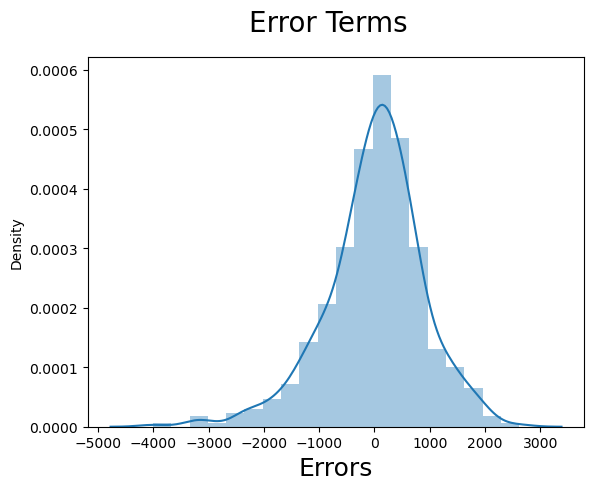

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

We can see that the error terms are normally distributed. So, now we can move ahead and start making predictions on the test set.

## Step 6: Making Predictions and evaluation on the test set

#### RESCALLING, we have to do that for the test set too.

In [61]:
# But we will use only the .transform() method for the test set.

# create a list of numeric vars
num_vars = ["temp", 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [64]:
# Making predictions
y_test_pred = lm_3.predict(X_test_new)

In [65]:
# evaluate
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print(r2)

0.7544657733109017


And our R-squared on the train set was 0.795 which is very close to the R-squared of the test set.

Text(0, 0.5, 'y_test_pred')

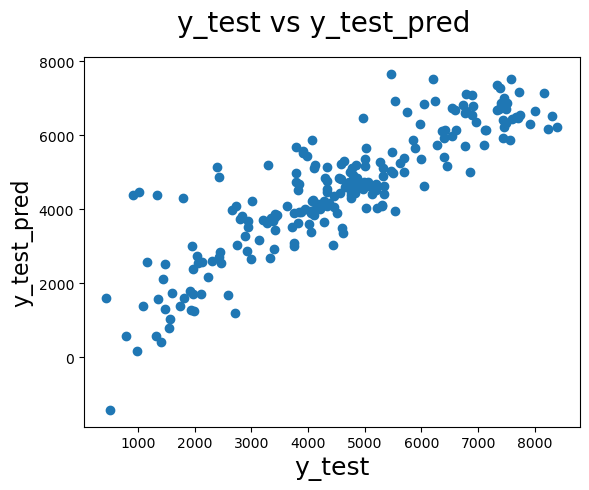

In [66]:
# Model Evaluation

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)         
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)     

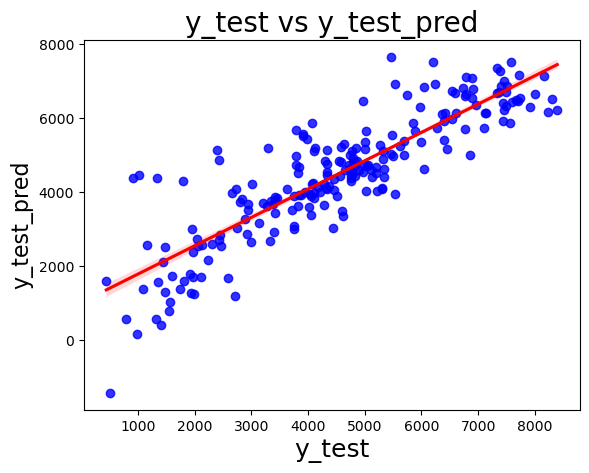

In [67]:
# Now fitting a best-fit line
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()